## ITDI Shared Task @ VarDial 2022 submission


In this notebook, we briefly introduce how to train and validate the Logistic Regression model developed to tackle the Identification of Languages and Dialects of Italy task from VarDial 2022 shared task. 

### Data loading
Firstly, we import some useful libraries and read the training and development data.

In [25]:
import pandas as pd
from utils import explain_label
from sklearn.model_selection import train_test_split

In [26]:
data_train = pd.read_csv("train.csv")
data, labels = data_train['text'].values, data_train['label'].values.astype(int)
#_, data, _, labels = train_test_split(data, labels, test_size=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=1)

In [28]:
print(X_train)
print(X_train.shape)

['Song ye budista y pertenez a la tribu de los hmong, afirma que caltién les sos creencies sagraes y históriques.'
 'Introducida en Bélxica, Alemaña y Suiza.'
 "Lo centro de poder d'Aquitania se desplaza enta Piteus y los contes de Rouerge, egualment poseyedors de Tolosa, se transmiten hereditariament."
 ... 'Teñen unha superficie de 2102\xa0km² e 32.713 habitantes.'
 'Harry S. Truman, nado en Lamar  dando fin á segunda guerra mundial.'
 "Escape to Victory  en a periferia d'a ciudat de París que se retransmitirá a toda Europa."]
(562676,)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

data_train = pd.read_csv("train.csv")
data, labels = data_train['text'].values, data_train['label'].values.astype(int)

_, data, _, labels = train_test_split(data, labels, test_size=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=1)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# Model training


## Logistic Regression

Import and initialize the logistic regression model. Fit it using the given training and validation data.

In [18]:
from models import LogisticRegressionITDI

model = LogisticRegressionITDI(verbose=1)
_, _, cm = model.fit(X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test)

Vectorizing and normalizing training data...
Fitting Logistic Regression...
Evaluating the model...
Training completed, train_f1 : 0.9967139170677264, val_f1 : 0.9905416428963686


Finally, plot the confusion matrix for the validation set.

In [20]:
print(cm.shape)

(5, 5)


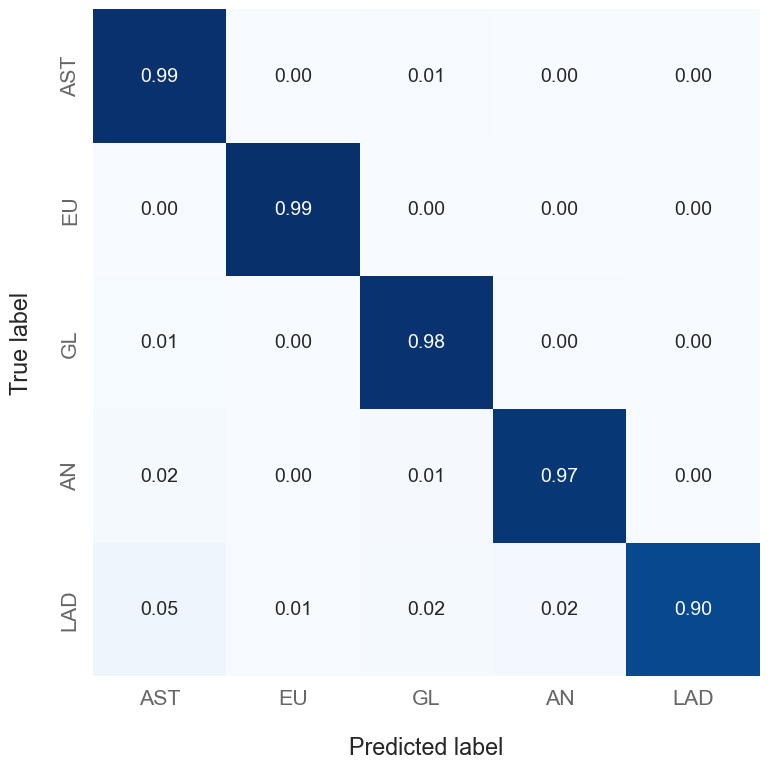

In [21]:
from utils import explain_label
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(cm, index = [explain_label(i)[:3] for i in range(0,5)], columns = [explain_label(i)[:3] for i in range(0,5)])

plt.figure(figsize = (8, 8))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(df_cm, 
            annot=True, 
            annot_kws={"size": 14}, 
            fmt='.2f', 
            cmap="Blues",
            cbar=False) 

plt.xlabel("Predicted label", labelpad=20)
plt.ylabel("True label", labelpad=20)

plt.setp(ax.get_xticklabels(), alpha=0.7)
plt.setp(ax.get_yticklabels(), alpha=0.7)

plt.tight_layout()  
plt.show()

Predict for the validation set and print some nice metrics for the dialects. 

In [22]:
pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings(): 
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10872
           1       0.99      0.99      0.99     12376
           2       0.98      0.98      0.98      8008
           3       0.98      0.97      0.97      5562
           4       0.99      0.90      0.95       694

    accuracy                           0.98     37512
   macro avg       0.99      0.97      0.98     37512
weighted avg       0.98      0.98      0.98     37512



### Inference
And now, some inference! Let's try to classify some Spanish dialects sentences that are not in the training set.

In [24]:
sentence = "estió un monesterio establito en se devantó a ma regla que dimpués fue seguita por cuantos monesterios griegos"
explain_label(model.predict(sentence)[0])

'AN'

In [25]:
sentence = "liña en universal"
explain_label(model.predict(sentence)[0])

'GL'

In [26]:
sentence = "lleis fonétiques sistemáticu palatalizan evolución"
explain_label(model.predict(sentence)[0])

'AST'

## Random Forest

Here we are going to use random forest to try and determine the dialects


In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=128, min_samples_split=4)
clf.fit(X_train_vectorized, y_train)

RandomForestClassifier(max_depth=128, min_samples_split=4)

In [37]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9401791426743442


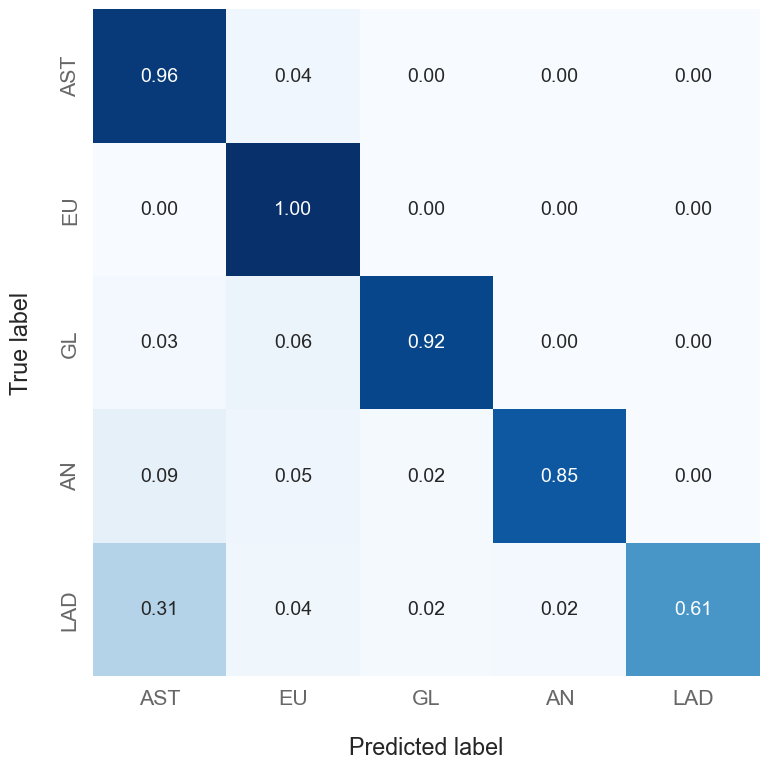

In [41]:
import numpy as np
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a dataframe from the normalized confusion matrix
df_cm = pd.DataFrame(cm_normalized, index=[explain_label(i)[:3] for i in range(0, 5)], columns=[explain_label(i)[:3] for i in range(0, 5)])

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.4)  # for label size
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='.2f', cmap="Blues", cbar=False)
plt.xlabel("Predicted label", labelpad=20)
plt.ylabel("True label", labelpad=20)
plt.setp(ax.get_xticklabels(), alpha=0.7)
plt.setp(ax.get_yticklabels(), alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:
pred = clf.predict(X_test_vectorized)



In [43]:
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings(): 
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10872
           1       0.92      1.00      0.96     12376
           2       0.98      0.92      0.95      8008
           3       0.99      0.85      0.91      5562
           4       1.00      0.61      0.76       694

    accuracy                           0.94     37512
   macro avg       0.96      0.87      0.90     37512
weighted avg       0.94      0.94      0.94     37512



In [49]:
print(X_train.shape[0])

56268


## Naive Bayes

For our third approach we use naive Bayes and fit it to our vectorized data.

In [4]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train_vectorized.toarray(), y_train)



GaussianNB()

In [5]:
y_pred = nb.predict(X_test_vectorized.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


NameError: name 'accuracy_score' is not defined

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9601194284495628


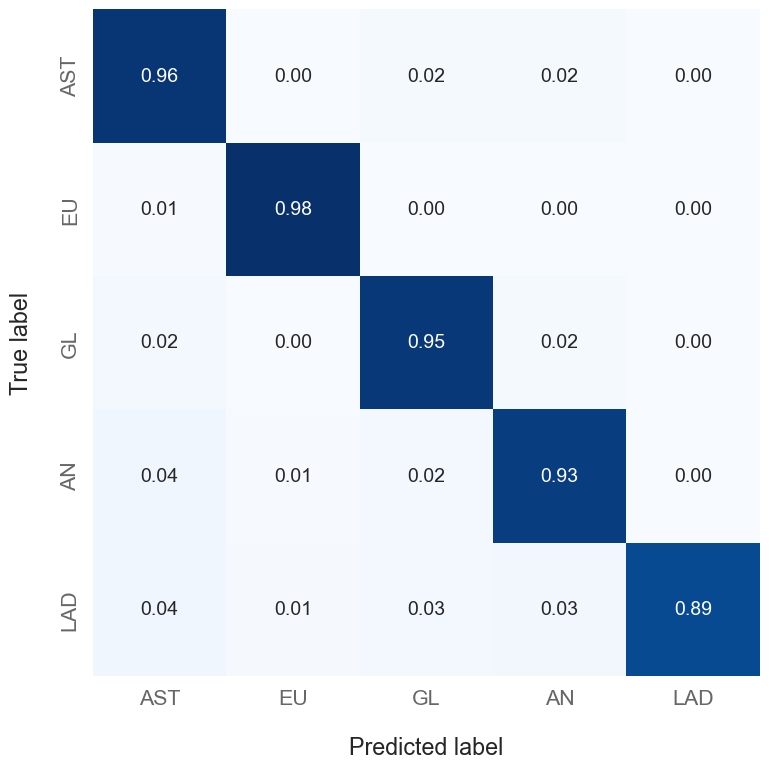

In [13]:
import numpy as np

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized, index=[explain_label(i)[:3] for i in range(0, 5)], columns=[explain_label(i)[:3] for i in range(0, 5)])

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.4)  # for label size
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='.2f', cmap="Blues", cbar=False)
plt.xlabel("Predicted label", labelpad=20)
plt.ylabel("True label", labelpad=20)
plt.setp(ax.get_xticklabels(), alpha=0.7)
plt.setp(ax.get_yticklabels(), alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings(): 
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10872
           1       0.99      0.98      0.99     12376
           2       0.95      0.95      0.95      8008
           3       0.92      0.93      0.93      5562
           4       0.89      0.89      0.89       694

    accuracy                           0.96     37512
   macro avg       0.94      0.94      0.94     37512
weighted avg       0.96      0.96      0.96     37512



# GPT-4 Comparison

The following is using GPT-4 to classify the text. Since GPT-4 


In [24]:
from openai import OpenAI

client = OpenAI()

def classify_text(text):
    response = client.chat.completions.create(
        model="gpt-4-1106-preview",
        messages=[
            {
                "role": "user",
                "content": f"User\nclassify the text as one of the following. Output only a single number. \n\n    'ast_texts' : 0,\n    'eu_texts' : 1,\n    'gl_texts' : 2,\n    'an_texts' : 3,\n    'lad_texts' : 4,\n\nWhere those stand for dialects.\n\n\nExample:  \n\n\nText: {text}\n\nOutput:"
            }
        ],
        temperature=0,
        max_tokens=100,
        top_p=0,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content
# Example usage:
output_number = classify_text("Tras volver a Leicester o seu peso corporal comezou a aumentar")
print(output_number)


2


In [46]:
def predictData(X_train):
    predictions = []
    for text in X_train:
        predictions.append(int(classify_text(text)))
    return predictions

In [47]:
# choose 200 random samples from each label in the training set and make sure to get their actual labels
import random

random.seed(100)

# Get the unique labels in the training set
unique_labels = set(y_train)

# Initialize empty lists to store the sampled data and labels
X_train_random = []
y_train_random = []

# Sample 200 entries from each label
for label in unique_labels:
    # Get the indices of entries with the current label
    label_indices = [i for i in range(len(y_train)) if y_train[i] == label]
    
    # Sample 200 random indices from the label indices
    random_indices = random.sample(label_indices, 200)
    
    # Append the sampled data and labels to the respective lists
    X_train_random.extend(X_train[random_indices])
    y_train_random.extend(y_train[random_indices])
    
# Convert the lists to numpy arrays
X_train_random = np.array(X_train_random)
y_train_random = np.array(y_train_random)


In [48]:
#print(X_train_random)
print(y_train_random)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [49]:
gpt_predictions = predictData(X_train_random)


In [50]:
print("Accuracy:", accuracy_score(gpt_predictions, y_train_random))

Accuracy: 0.758


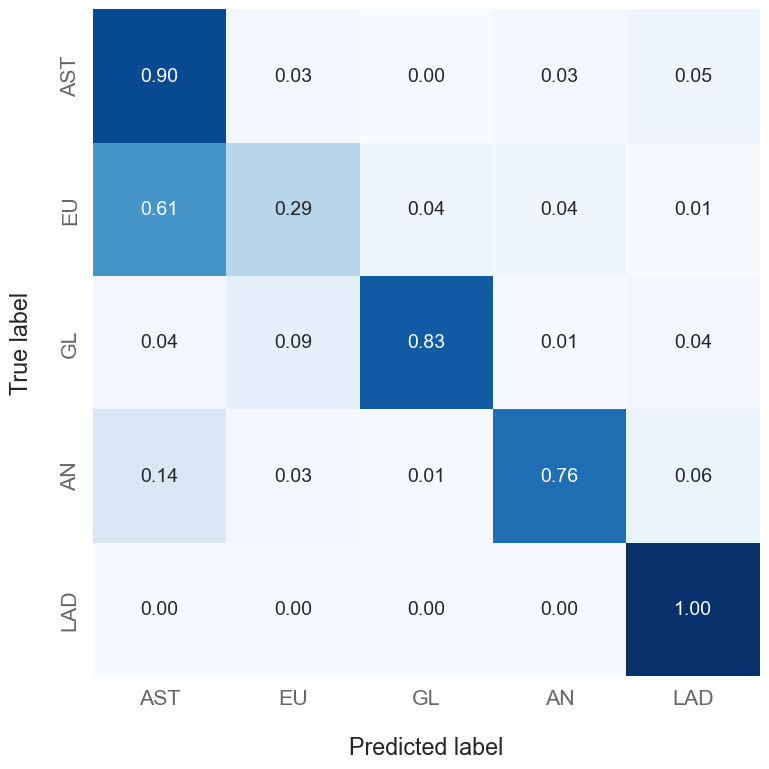

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_train_random, gpt_predictions)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a dataframe from the normalized confusion matrix
labels = [explain_label(i)[:3] for i in range(0, 5)]
df_cm = pd.DataFrame(cm_normalized, index=labels, columns=labels)

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.4)  # for label size
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='.2f', cmap="Blues", cbar=False)
plt.xlabel("Predicted label", labelpad=20)
plt.ylabel("True label", labelpad=20)
plt.setp(ax.get_xticklabels(), alpha=0.7)
plt.setp(ax.get_yticklabels(), alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings(): 
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_train_random, gpt_predictions))


              precision    recall  f1-score   support

           0       0.53      0.90      0.67       200
           1       0.68      0.29      0.41       200
           2       0.94      0.83      0.88       200
           3       0.92      0.76      0.83       200
           4       0.87      1.00      0.93       200

    accuracy                           0.76      1000
   macro avg       0.79      0.76      0.74      1000
weighted avg       0.79      0.76      0.74      1000

